# ADABoost To Predict Survival With The Titanic Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
titanic_df = pd.read_csv('titanic.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## EDA

In [3]:
titanic_df.shape

(418, 12)

In [4]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [5]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [6]:
titanic_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


<p style="padding-top:30px">Check for missing and duplicated values</p>

In [7]:
titanic_df.duplicated().sum()

0

In [8]:
titanic_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

The dataset has no duplicated values but the <b>Age</b> and <b>Cabin</b> have missing values 

In [9]:
for column in titanic_df.columns:
    count = titanic_df[column].value_counts().count()
    print(f'{column}: {count}')
    

PassengerId: 418
Survived: 2
Pclass: 3
Name: 418
Sex: 2
Age: 79
SibSp: 7
Parch: 8
Ticket: 363
Fare: 169
Cabin: 76
Embarked: 3


By counting the number of unique values in each column we can be able to tell if a column has the expected number. For example for the column <b>PClass</b> we expect only 3 unique classes  

#### check for outliers

For this we will check the <b>Age</b> and <b>Fare</b> for outliers values that migh affect the model considering ADABoost is sensitive to outliers. For this we will use boxplots to visualize the two columns

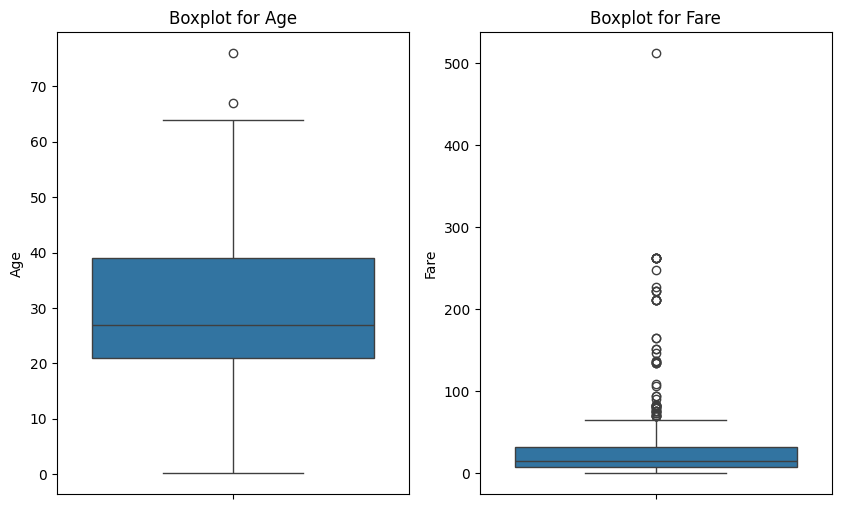

In [10]:
plt.figure(figsize=(10,6))

# subplot for Age
plt.subplot(1,2,1)
sns.boxplot(titanic_df['Age'])
plt.title('Boxplot for Age')

# subplot for Fare
plt.subplot(1,2,2)
sns.boxplot(titanic_df['Fare'])
plt.title('Boxplot for Fare')

plt.show()

Age has fewer outliers than fare. This can be attributed to the fact that the tickert prices for first class were extremely high compared to the restt of the classes

## Data manipulation

First we drop columns that will not have any impact in the model training. These are <b>PassengerId</b>, <b>Name</b> and <b>Ticket</b>

In [11]:
titanic_df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

In [12]:
titanic_df['Cabin'].isna().sum()/titanic_df.shape[0]*100

78.22966507177034

The number of null values in the <b>Cabin</b> column represents 78.23% of the total number of records in the column. For this reason we will exclude it from the model training

In [13]:
titanic_df.drop('Cabin', axis=1, inplace=True)

For the age column we use the 

In [14]:
from sklearn.impute import SimpleImputer

In [15]:
simple_imputer_1 = SimpleImputer(strategy='mean')
titanic_df['Age'] = simple_imputer_1.fit_transform(titanic_df[['Age']])

In [16]:
simple_imputer_2 = SimpleImputer(strategy='most_frequent')
titanic_df['Fare'] = simple_imputer_2.fit_transform(titanic_df[['Fare']])

In [17]:
titanic_df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

#### Remove the outliers

For this we use the z-score to detect the outliers and the winsorize technique to mitigate the outliers in the columns of <b>age</b> and <b>Fare</b>

In [18]:
from scipy.stats import zscore

In [19]:
zscores = zscore(titanic_df[['Age','Fare']])
zscores

,Age,Fare
0,0.334993,-0.497063
1,1.325530,-0.511926
2,2.514175,-0.463754
3,-0.259330,-0.482127
4,-0.655545,-0.417151
...,...,...
413,0.000000,-0.493105
414,0.691586,1.314557
415,0.651965,-0.507445
416,0.000000,-0.493105


Typically values that fall outside a z-score of 3 or -3 are considered outliers 

In [20]:
outliers = np.where(np.abs(zscores>3))
outliers

(array([ 24,  53,  59,  64,  69,  74,  75,  81,  96, 114, 142, 156, 184,
        202, 218, 324, 343, 375, 407]),
 array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]))

The data contains outliers and we will use the winsorize technique to remove them

In [21]:
from scipy.stats.mstats import winsorize

In [22]:
titanic_df['Age'] = winsorize(titanic_df['Age'],limits=[0.15,0.15])
titanic_df['Fare'] = winsorize(titanic_df['Fare'],limits=[0.15,0.15])

#### Visualize the outliers 

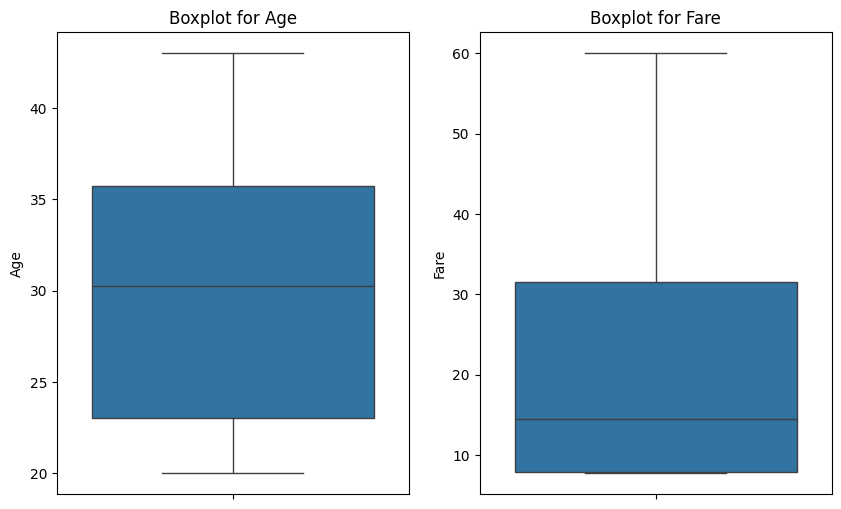

In [23]:
plt.figure(figsize=(10,6))

# subplot for Age
plt.subplot(1,2,1)
sns.boxplot(titanic_df['Age'])
plt.title('Boxplot for Age')

# subplot for Fare
plt.subplot(1,2,2)
sns.boxplot(titanic_df['Fare'])
plt.title('Boxplot for Fare')

plt.show()

From the boxplots, the dataset no longer contains outliers

#### Data encoding

In [24]:
from sklearn.preprocessing import LabelEncoder

In [25]:
label_encoder = LabelEncoder()
for column in ['Sex', 'Embarked']:
    titanic_df[column] = label_encoder.fit_transform(titanic_df[column])

## Model

Define the independent and dependant variables

In [26]:
# independant features X
X = titanic_df.drop('Survived', axis=1)

In [27]:
# dependant variable y
y = titanic_df['Survived']

<p style='padding-top:25px'>Split the data into training set and test set </p>

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
from sklearn.ensemble import AdaBoostClassifier

In [31]:
ada_classifier = AdaBoostClassifier(n_estimators=99,random_state=42, learning_rate=1)

In [32]:
ada_classifier.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=1, n_estimators=99, random_state=42)

In [33]:
y_predict = ada_classifier.predict(X_test)
y_predict

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1])

## Metrics

In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score

In [35]:
Accuracy = accuracy_score(y_test, y_predict)
MAE = mean_absolute_error(y_test, y_predict)
MSE = mean_squared_error(y_test, y_predict)
RMSE = np.sqrt(MSE)

print( {
'Accuracy': Accuracy,
'MAE' : MAE,
'MSE' : MSE,
'RMSE' : RMSE,
})

{'Accuracy': 1.0, 'MAE': 0.0, 'MSE': 0.0, 'RMSE': 0.0}
